<a href="https://colab.research.google.com/github/VAMSHINEELAMMA/SAMSUNG-INNOVATION-CAMPUS/blob/main/Predict_Next_word_or_sentence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.optimizers import Adam

In [2]:
# Sample dataset (use a larger dataset for better performance)
data = """
Once upon a time there was a kingdom.
The king was wise and just.
He ruled his people with kindness.
"""

In [3]:
# Tokenize the data
tokenizer = Tokenizer()

tokenizer.fit_on_texts([data])

total_words = len(tokenizer.word_index) + 1

total_words

19

In [4]:
# Create input sequences
input_sequences = []

for line in data.split('.'):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)


In [5]:
# Pad sequences and create predictors and labels
max_sequence_len = max([len(x) for x in input_sequences])

input_sequences = np.array(pad_sequences(input_sequences,
                                         maxlen=max_sequence_len,
                                         padding='pre'))

predictors, labels = input_sequences[:,:-1], input_sequences[:,-1]

labels = tf.keras.utils.to_categorical(labels, num_classes=total_words)


In [6]:
# Build the model
model = Sequential()

model.add(Embedding(total_words, 100,
                    input_length=max_sequence_len-1))

model.add(LSTM(150,
               return_sequences=True))

model.add(LSTM(100))

model.add(Dense(total_words,
                activation='softmax'))

adam = Adam(learning_rate=0.01)

model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [7]:

model.fit(predictors, labels, epochs=100, verbose=1)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.0000e+00 - loss: 2.9460
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step - accuracy: 0.1176 - loss: 2.8822
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.1765 - loss: 2.6763
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.1176 - loss: 2.4020
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.1765 - loss: 2.3998
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.2941 - loss: 2.2486
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.2941 - loss: 2.1058
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.3529 - loss: 1.7612
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.3529 - loss: 1.6188
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.4706 - loss: 1.4418
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.5882 - loss: 1.2475
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.7647

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 7, 100)         │         1,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 7, 150)         │       150,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100)            │       100,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 19)             │         1,919 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 764,459 (2.92 MB)

 Trainable params: 254,819 (995.39 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 509,640 (1.94 MB)

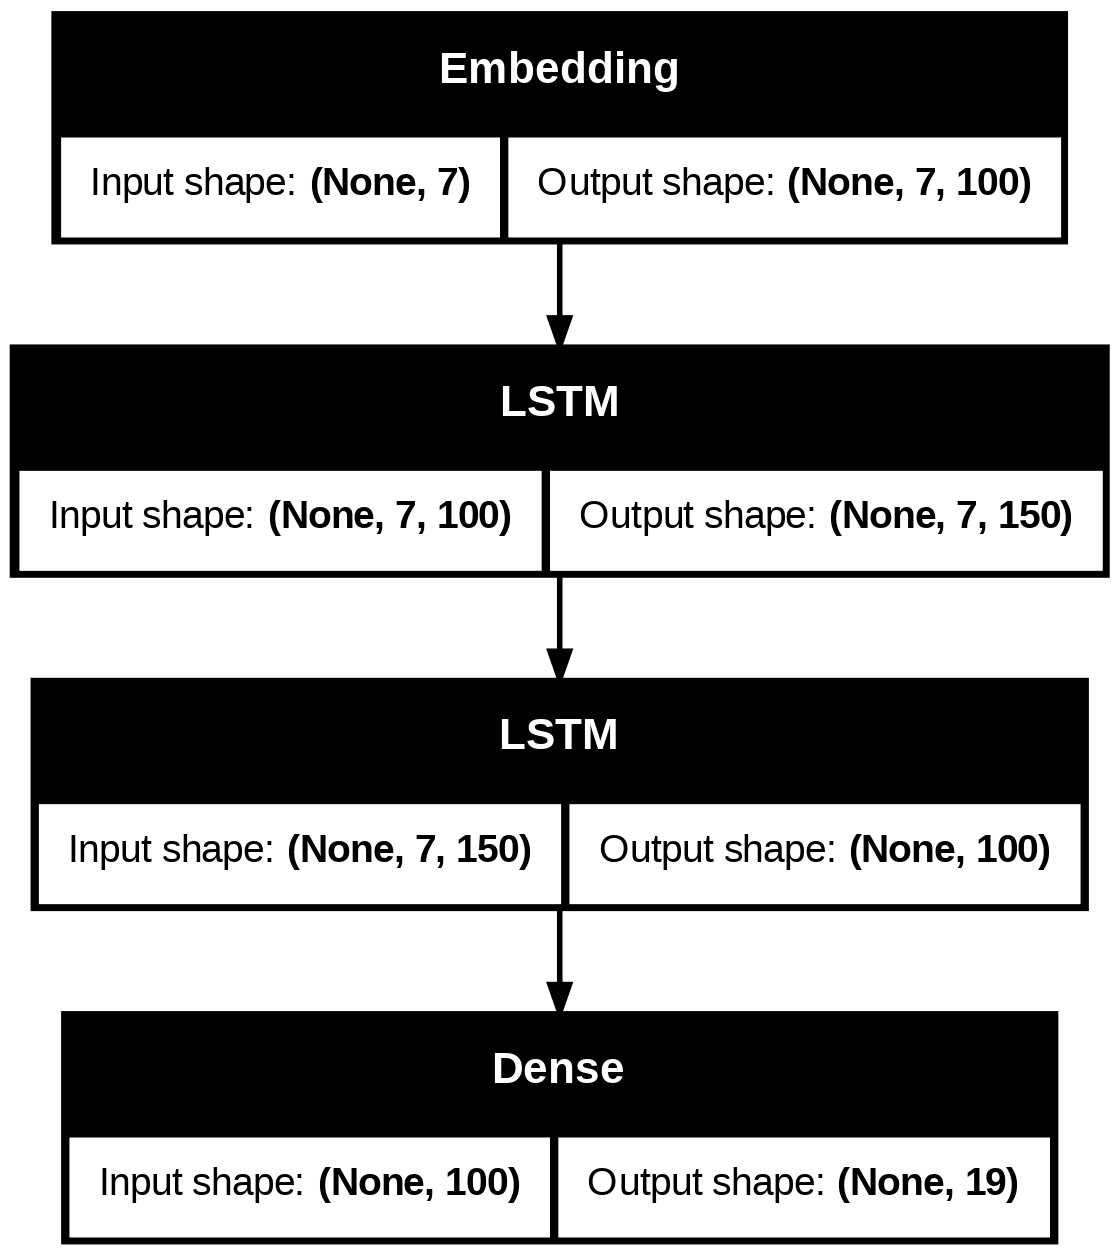

In [9]:
from tensorflow import keras
keras.utils.plot_model(model, show_shapes=True)

In [10]:
# Function to predict the next word
def predict_next_word(model, tokenizer, text):
    sequence = tokenizer.texts_to_sequences([text])[0]
    sequence = pad_sequences([sequence],
                             maxlen=max_sequence_len-1,
                             padding='pre')
    predicted = np.argmax(model.predict(sequence),
                          axis=-1)
    return tokenizer.index_word[predicted[0]]


In [11]:
# Function to predict the next sentence (naive approach by predicting words until a period is generated)
def predict_next_sentence(model, tokenizer, text, max_length=20):
    next_sentence = text
    for _ in range(max_length):
        next_word = predict_next_word(model,
                                      tokenizer,
                                      next_sentence)
        next_sentence += ' ' + next_word
        if next_word == 'kingdom':
            break
    return next_sentence


In [12]:
# Test the model
input_text = "Once upon a time"

print("Input:", input_text)

Input: Once upon a time


In [13]:
print("Next word prediction:", predict_next_word(model,
                                                 tokenizer,
                                                 input_text))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step
Next word prediction: there


In [14]:
print("Next sentence prediction:", predict_next_sentence(model,
                                                         tokenizer,
                                                         input_text))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Next sentence prediction: Once upon a time there was a kingdom


Example 2

In [15]:
# Test the model
input_text = input()
######################################################
print("Next word prediction:", predict_next_word(model,
                                                 tokenizer,
                                                 input_text))
##########################################################
print("Next sentence prediction:", predict_next_sentence(model,
                                                         tokenizer,
                                                         input_text))


time
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Next word prediction: upon
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Next sentence prediction: time upon a time there was a kingdom
